###  CLASSIFICATION OF DEATH RECORDS BY CAUSE OF DEATH USING NATURAL LANGUAGE PROCESSING

**SPRINGBOARD DATA SCIENCE CAREER TRACK - CAPSTONE 2
<br> 
Maya Bhat-Gregerson
<br> 
July 2020**

**OVERVIEW**
<br>
In this project I apply natural language processing tools to classify deaths in Washington State into broad leading causes of death groups based on information provided on the death certificate by the health care provider certifying the death. In particular, I try to use NLP to identify the likely underlying causes of death for deaths where the certifier provided vague or non-specific information rendering the record unhelpful in epidemiological analyses.

**INTRODUCTION**
<br> 
Health care providers completing death certificates are required to report the cause of death for each decedent in designated text fields.  Rules for reporting causes of death require certifiers to list the causal sequence of conditions in the chain of events leading from an initiating disease (such as lung cancer) or health event (such as an injury) to death. Of this series of distal and proximal causes, one cause is selected by the National Center for Health Statistics (NCHS) as the underlying cause of that death. The remaining health events between the initiating underlying cause and death are known as 'multiple causes'.  NCHS converts cause of death information reported in text format into one or more codes based on the International Classification of Disease, 10th revision (ICD-10). One code corresponds with the underlying cause of death while the remaning correspond with each of the so-called "multiple causes" listed by the certifier.
<br> 

For every death record there is one underlying cause (UCOD) ICD-10 code and up to 20 additional multiple cause (MC) ICD-10 codes that represent all of the causes listed on the death certificate. The multiple cause code in the first position ('MC1' in this data set) is always the same as the UCOD code ('UCOD' in this data set).

Ideally, when reporting causes of death certifiers should adhere to a set of established rules on how to report this information including the sequence in which they should be reported and the position in the text fields in which they should be entered. The accuracy of cause of death coding and the selection of an underlying cause of death by NCHS depend on accurate reporting. 
<br>
<br>
Often, due to inadequate training as well as the inherent complexity of the reporting rules, certifiers enter vague information in the cause of death portion of death certificates that results in the death record being assigned a 'garbage code' as the ICD-10 code representing the underlying cause.  Garbage underlying cause codes are always excluded from epidemiological analyses.  In Washington State, out of an annual total of approximately 57,000 deaths, upto 7% of the death records contain useless underlying cause ICD-10 codes, meaning that roughly 4,000 deaths a year don't add to our understanding of patterns of mortality in the state.
<br>
<br>
One possible avenue for salvaging these records is to use the multiple cause of death information to classify them into broad categories of death such as 'cancer', or 'heart disease'.  Peer-reviewed articles published by epidemiologists document their attempts to use a variety of machine learning models including multinomial Naive Bayes and logistic regression to classify records with garbage underlying codes. The problem inherent in these supervised learning methods is that we don't have accurate cause of death labels for death records with garbage underlying codes so it's not possible to assess directly whether a given model is accurate in re-assigning these records into predefined categories.  The models are trained on records with 'valid' underlying cause codes for which labels are available. Without laborious manual review, it is difficult to be certain that these models are equally good at classifying records with garbage underlying cause codes.
<br>
<br>
I modified this approach to classifying records with garbage underlying cause codes (UC codes) using Latent Dirichlet Allocation (LDA), an unsupervised machine learning (ML) method, *in conjunction with* predictions of supervised ML models trained using Multinomial Naive Bayes and Support Vector Machine algorithms. The higher the degree of concordance between the three models, the more confident we can be of the predicted class of a given death record with a garbage UC code.
<br> 
<br> 

**Figure 1. Cause of death text fields on death certificates**
<br> 
<br> 

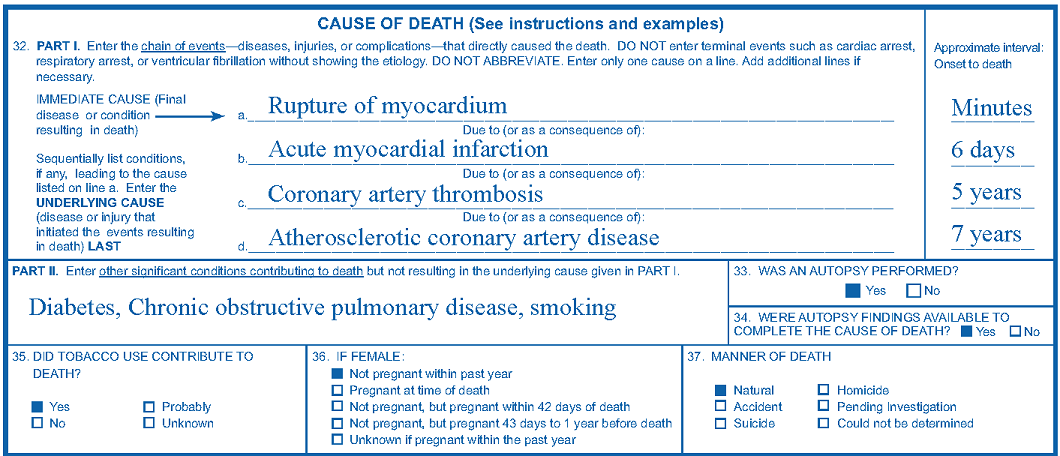

<br> 

The figure below outlines the data cleaning and analysis plan for this project.

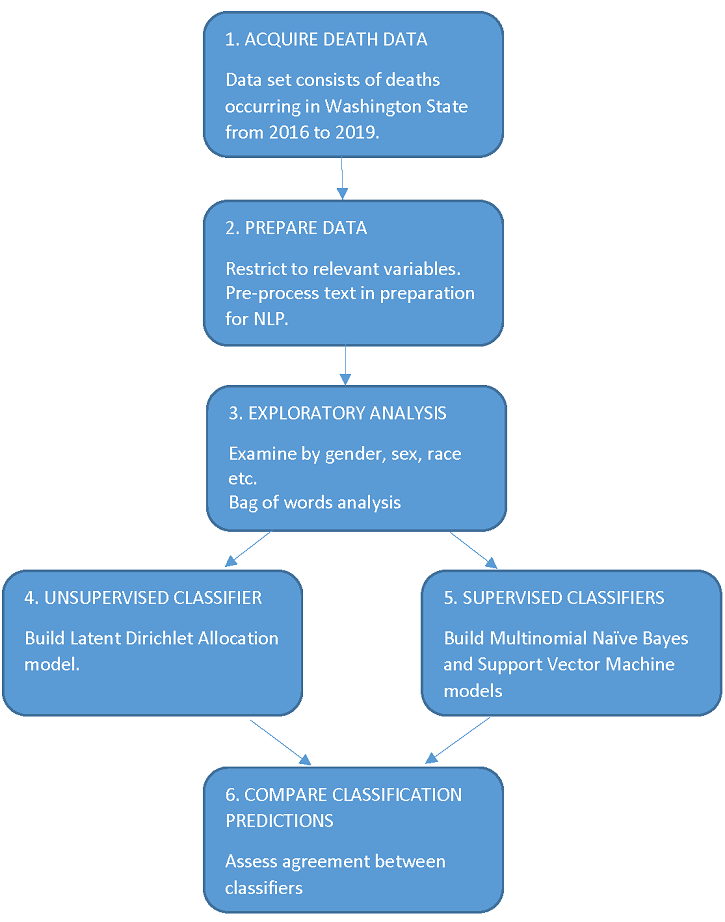

**Natural language processing using cause of death literal vs. cause of death ICD-10 codes**

Initially, I intended to use cause of death literal text for natural language processing.  However, during the text pre-processing steps, it became clear that generally available tools for cleaning text including removing 'stop words' are geared towards day-to-day language and therefore, less effective at removing words that occur frequently but offer little information. It was difficult to find a pre-existing list of stopwords specialized for use with healthcare related text.
<br> 
<br> 
Eventually, I decided to use ICD-10 codes assigned to each death record as the UCOD code or one of the multiple cause (MC) codes to conduct my analysis. The advantage of doing so is that much of the standardization and removal of extraneous language is already accomplished through the process of assigning ICD-10 codes to the records to represent the causes of death listed in the text literal fields.  I ended up using a field with all multiple cause fields MC2 through 20 (called "MC2_20" in this data set) concatenated and the UCOD code field.

**Next notebook: 1_Acquire_death_data.ipynb**